In [1]:
# ***Be sure to source setup.bash before launching jupyter server***
%matplotlib inline

import rospy
import rosbag
import numpy as np
import json
import os
import glob
import matplotlib.pyplot as plt
import tf_conversions
import scipy.stats as st

from custom_messages.msg import SimulationDataMsg

In [2]:
def point_to_numpy(point):
    return np.array([point.x, point.y, point.z])
def vec_to_numpy(vec):
    return point_to_numpy(vec)
def quat_to_numpy(quat):
    return np.array([quat.x, quat.y, quat.z, quat.w])
def quat_to_rpy(quat):
    # note: need numpy quaternion
    return tf_conversions.transformations.euler_from_quaternion(quat)

In [3]:
experiment_defs_root = "defs"
experiment_gen_root = "gen"
specific_experiment_paths = [['calibration_circuit.json']]#, ['calibration_circuit_mirror.json']] # subbpath to only process 1 experiment dir or .json, not all at once
if len(specific_experiment_paths) > 0:
    specific_experiments = [os.path.join(*p) for p in  specific_experiment_paths]


In [4]:
defs_paths = []
if len(specific_experiment_paths) > 0:
    defs_paths = []
    for specific_experiment in specific_experiments: 
        if specific_experiment.endswith('.json'):
            defs_paths.append([specific_experiment.split('.')[-2]])
else:
    # walk recursively to find all .json defs
    if len(specific_experiment_path) > 0:
        walk_root = os.path.join(experiment_defs_root, specific_experiment)
    else:
        walk_root = experiment_defs_root
    for path, dirs, files in os.walk(walk_root):
        for f in files:
            if f.endswith('.json'):
                name = f.split('.')[0]
                defs_paths.append(path.split('/')[1:] + [name])

In [5]:
defs_paths

[['calibration_circuit']]

In [231]:
# each of the paths found in defs should also be under gen
# ie. defs/exp1/cam1.json => gen/exp1/cam1/runner_n/run_i


## --- do i need this bit? --- TODO cleanup
if len(specific_experiment_paths) > 0:
    gens = []
    for i, specific_experiment in enumerate(specific_experiments):
        specific_experiment_path = specific_experiment_paths[i]
        if specific_experiment.endswith('.json'):
            gens.append(os.path.join(experiment_gen_root, *specific_experiment_path[:-1]))
        else:
            gens.append(os.path.join(experiment_gen_root, specific_experiment))
else:
    gens = [experiment_gen_root]
    

def_files = []
all_bag_files = []
for experiment_path in defs_paths:
    def_files.append(experiment_path)
    gen_path = os.path.join(experiment_gen_root, os.path.join(*experiment_path))
    if os.path.isdir(gen_path):
        with open(os.path.join(experiment_defs_root, os.path.join(*experiment_path)) + ".json") as f:
            exp_config = json.load(f)


        # collect all .bag files!
        bag_files = []
        for path, dirs, files in os.walk(gen_path):
            for f in files:
                if f.endswith('.bag'):
                    bag_file_path = os.path.join(path, f)
                    bag_files.append(bag_file_path)
        all_bag_files.append(bag_files)

    else:
        print("{0} is not generated!".format(gen_path))

print(specific_experiments)
print(all_bag_files)
print([len(x) for x in all_bag_files])

['calibration_circuit.json']
[['gen/calibration_circuit/runner_0/run_3/sim_data.bag', 'gen/calibration_circuit/runner_0/run_2/sim_data.bag', 'gen/calibration_circuit/runner_0/run_5/sim_data.bag', 'gen/calibration_circuit/runner_0/run_0/sim_data.bag', 'gen/calibration_circuit/runner_0/run_6/sim_data.bag', 'gen/calibration_circuit/runner_0/run_1/sim_data.bag', 'gen/calibration_circuit/runner_0/run_4/sim_data.bag']]
[7]


In [315]:
bag = rosbag.Bag(all_bag_files[0][3])
# print(bag)
# # reorder bag based on EKF header timestamps...
# with rosbag.Bag('tmp.bag', 'w') as outbag:
#     for topic, msg, t in bag.read_messages():
#         outbag.write(topic, msg, msg.ekf_odom.header.stamp)

# bag2 = rosbag.Bag('tmp.bag')


In [188]:
print(np.rad2deg(quat_to_rpy(np.array([0.0, 0.0, 0.687303979,0.726369905231]))))
print(np.rad2deg(np.arctan2(18.509998005, 0.86677622199)))

[  0.          -0.          86.83414511]
87.3189426209


In [151]:

for i, msg in enumerate(bag2):
    print(msg)
    if i > 200:
        break


    

BagMessage(topic='/simulation_data', message=header: 
  seq: 1
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
true_odom: 
  header: 
    seq: 582
    stamp: 
      secs: 62
      nsecs: 696000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 0.464745956328
        y: 0.000155978795458
        z: 0.00537599519283
      orientation: 
        x: -8.17336408019e-07
        y: 0.000379666754648
        z: -0.000287828300765
        w: 0.999999886504
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 1.87036285855
        y: -0.00105913748541
        z: -0.000612430398219
      angular: 
        x: 1.67429086949e-05
        y: -0.00530824996783
        z: -0.0920703766891
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

  path_curvature: 0.0, timestamp=rospy.Time[69178000000])
BagMessage(topic='/simulation_data', message=header: 
  seq: 52
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
true_odom: 
  header: 
    seq: 1241
    stamp: 
      secs: 69
      nsecs: 286000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 89.0338684437
        y: -0.127287851847
        z: 0.0054096235661
      orientation: 
        x: 5.79437682872e-09
        y: 0.000385792727116
        z: -0.000958199547396
        w: 0.999999466509
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 20.0510135197
        y: -0.0417722939111
        z: -0.000559346676292
      angular: 
        x: 0.000122789915391
        y: -0.00336580968453
        z: 0.0895973343731
    covariance:

BagMessage(topic='/simulation_data', message=header: 
  seq: 98
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
true_odom: 
  header: 
    seq: 1832
    stamp: 
      secs: 75
      nsecs: 196000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 207.034986532
        y: -0.137076376173
        z: 0.00541075266079
      orientation: 
        x: -1.62758696328e-06
        y: 0.000385885022934
        z: 0.000552083440738
        w: 0.999999773147
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 19.9691492228
        y: 0.0244659709934
        z: -0.000445197055261
      angular: 
        x: -4.08775244271e-05
        y: -0.00342931428692
        z: -0.0903066995346
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

  path_curvature: 0.0, timestamp=rospy.Time[80220000000])
BagMessage(topic='/simulation_data', message=header: 
  seq: 137
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
true_odom: 
  header: 
    seq: 2343
    stamp: 
      secs: 80
      nsecs: 306000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 308.391049555
        y: -0.15788940767
        z: 0.00542591274902
      orientation: 
        x: -4.4729705362e-07
        y: 0.000386730901752
        z: -0.000178052288769
        w: 0.999999909368
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 18.5560209956
        y: -0.0102148608041
        z: -0.000368125479985
      angular: 
        x: 0.000104747200249
        y: -0.00274766458532
        z: 0.0895061377776
    covariance

  path_curvature: 0.04, timestamp=rospy.Time[85900000000])
BagMessage(topic='/simulation_data', message=header: 
  seq: 186
  stamp: 
    secs: 0
    nsecs:         0
  frame_id: ''
true_odom: 
  header: 
    seq: 2913
    stamp: 
      secs: 86
      nsecs:   6000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 376.325357222
        y: 19.3380402629
        z: 0.00541264318156
      orientation: 
        x: -0.000262040337407
        y: 0.000283064126841
        z: 0.703226558526
        w: 0.710965722517
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: 0.106157317207
        y: 12.5159911883
        z: -0.00105598793281
      angular: 
        x: 0.0032464625826
        y: 0.00122540266017
        z: 0.266941094968
    covariance: [0.0, 0.

In [272]:
print(msg)

BagMessage(topic='/simulation_data', message=header: 
  seq: 202
  stamp: 
    secs: 87
    nsecs: 598000000
  frame_id: "map"
true_odom: 
  header: 
    seq: 1565
    stamp: 
      secs: 87
      nsecs: 570000000
    frame_id: "map"
  child_frame_id: "base_link"
  pose: 
    pose: 
      position: 
        x: 373.341763963
        y: 47.9941032443
        z: 0.00535187269407
      orientation: 
        x: -0.000307232138395
        y: 0.000240300168148
        z: 0.714158905344
        w: 0.699983503936
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  twist: 
    twist: 
      linear: 
        x: -0.357944102451
        y: 17.6451876726
        z: -0.000923066545304
      angular: 
        x: 0.0076373364335
        y: -0.00288389795385
        z: -0.309196656979
    covariance: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [189]:
def extract_path_points(bag):
    ts = []
    target_path_points = []
    actual_path = []
    ekf_path = []
    for msg in bag:
        ts.append(msg.timestamp.to_sec())
        msg = msg.message
        target_path_points.append(point_to_numpy(msg.path_update.target_point))
        actual_path.append(point_to_numpy(msg.true_odom.pose.pose.position))
        ekf_path.append(point_to_numpy(msg.ekf_odom.pose.pose.position))
    return np.array(ts), np.array(target_path_points), np.array(actual_path), np.array(ekf_path)

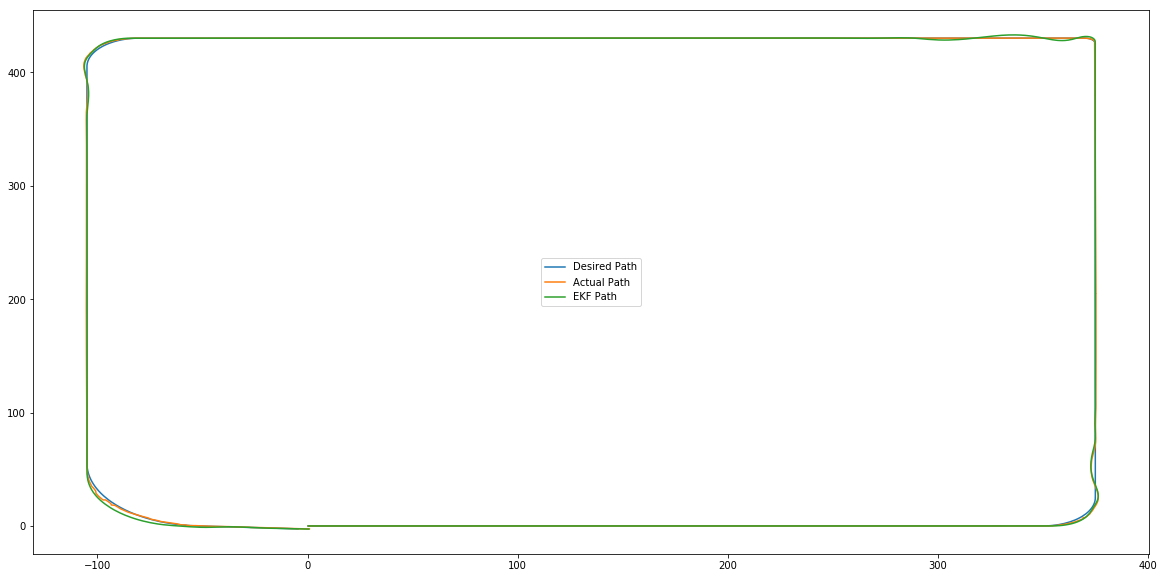

In [240]:
ts, pts, actual_pts, ekf_pts = extract_path_points(bag)
plt.figure(figsize=(20,10))
plt.plot(pts[:, 0], pts[:, 1])
plt.plot(actual_pts[:, 0], pts[:, 1])
plt.plot(ekf_pts[:, 0], ekf_pts[:, 1])
plt.legend(("Desired Path", "Actual Path", "EKF Path"))
plt.show()

In [166]:
def extract_velocity_profiles(bag, straight_speed=20.0, radius_speed_mult=0.5):
    time_axis = []
    target_speeds = []
    actual_speeds = []
    ekf_speeds = []
    curvature_speeds = []
    for msg in bag:
        time_axis.append(msg.timestamp.to_sec())
        msg = msg.message
        target_speeds.append(msg.path_update.velocity_controller_target)
        actual_speeds.append(np.linalg.norm(vec_to_numpy(msg.true_odom.twist.twist.linear)))
        ekf_speeds.append(np.linalg.norm(vec_to_numpy(msg.ekf_odom.twist.twist.linear)))
        curvature = np.abs(msg.path_update.path_curvature)
        if curvature == 0.0:
            curvature_speeds.append(straight_speed)
        else:
            curvature_speeds.append(min(straight_speed, radius_speed_mult/curvature))
    return time_axis, target_speeds, actual_speeds, ekf_speeds, curvature_speeds

In [167]:
times, target, actual, ekf, curvature_speeds = extract_velocity_profiles(bag)

Average speed: 17.0909766144


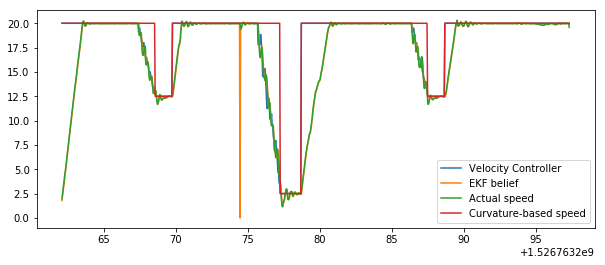

In [241]:
plt.figure(figsize=(10,4))
_ = plt.plot(times, np.vstack([target, ekf, actual, curvature_speeds]).T)
plt.legend(("Velocity Controller", "EKF belief","Actual speed", "Curvature-based speed"))
print("Average speed: {0}".format(np.mean(actual)))

In [169]:
def extract_crosstrack_error(bag):
    time_axis = []
    true_errors = []
    believed_errors = []
    curvature = []
    for msg in bag:
        time_axis.append(msg.timestamp.to_sec())
        msg = msg.message
        target_point = vec_to_numpy(msg.path_update.target_point)
        believed_pos = point_to_numpy(msg.ekf_odom.pose.pose.position)
        actual_pos = point_to_numpy(msg.true_odom.pose.pose.position)
        
        # since the exactly distance appears to be very unreliable (timing mismatch during data recording => record path target point from a different timestep as current point)
        # compute crosstrack distance here         
        normal = vec_to_numpy(msg.path_update.path_normal)
        diff_believed = believed_pos - target_point
        diff_actual = actual_pos - target_point
        # project onto normal
        true_errors.append(np.dot(normal, diff_actual))
        believed_errors.append(np.dot(normal, diff_believed))
        
        curvature.append(np.abs(msg.path_update.path_curvature))

        
    return np.array(time_axis), np.array(true_errors), np.array(believed_errors), np.array(curvature)

In [263]:
times, true_errors, believed_errors, curvatures = extract_crosstrack_error(bag)
radii = np.array([None if c == 0.0 else 0.1/c for c in curvatures])

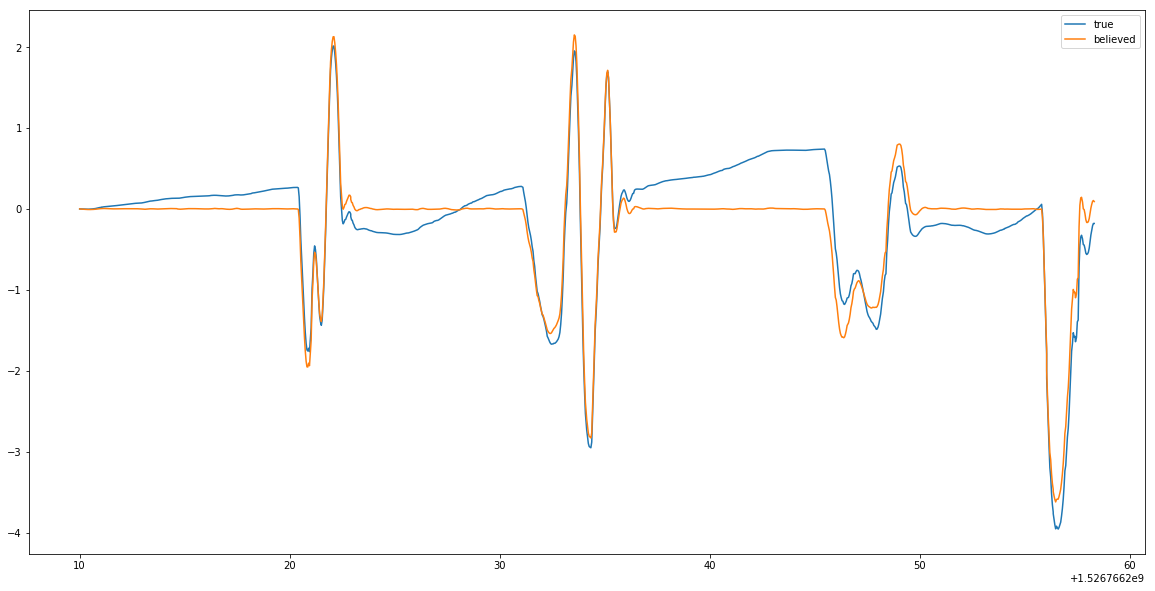

In [264]:
plt.figure(figsize=(20,10))
_ = plt.plot(times, np.vstack([true_errors, believed_errors]).T)
plt.legend(("true", "believed"))

In [172]:
def extract_orientations(bag):
    time_axis = []
    true_headings = []
    believed_headings = []
    tangent_headings = []
    for msg in bag:
        time_axis.append(msg.timestamp.to_sec())
        msg = msg.message
        target_tangent = vec_to_numpy(msg.path_update.target_heading)
        # convert tangent to heading
        tangent_headings.append(np.rad2deg(np.arctan2(target_tangent[1], target_tangent[0])))
        if tangent_headings[-1] < -10:
            tangent_headings[-1] += 360
            
        # true heading
#         true_quat = quat_to_numpy(msg.true_odom.pose.pose.orientation)
#         true_rpy = np.rad2deg(quat_to_rpy(true_quat))
#         if true_rpy[2] < -10:
#             true_rpy[2] += 360
#         true_heading.append(true_rpy[2])
        vel = vec_to_numpy(msg.true_odom.twist.twist.linear)
        true_heading = np.rad2deg(np.arctan2(vel[1], vel[0]))
        if true_heading < -10:
            true_heading += 360
        true_headings.append(true_heading)
        
        #ekf heading
#         ekf_quat = quat_to_numpy(msg.ekf_odom.pose.pose.orientation)
#         ekf_rpy = np.rad2deg(quat_to_rpy(ekf_quat))
#         if ekf_rpy[2] < -10:
#             ekf_rpy[2] += 360
#         believed_headings.append(ekf_rpy[2])

        ekf_vel = vec_to_numpy(msg.ekf_odom.twist.twist.linear)
        ekf_heading = np.rad2deg(np.arctan2(ekf_vel[1], ekf_vel[0]))
        if ekf_heading < -10:
            ekf_heading += 360
        believed_headings.append(ekf_heading)
        
    return np.array(time_axis), np.array(true_headings), np.array(believed_headings), np.array(tangent_headings)

In [173]:
times, actual_headings, ekf_headings, curve_headings = extract_orientations(bag)

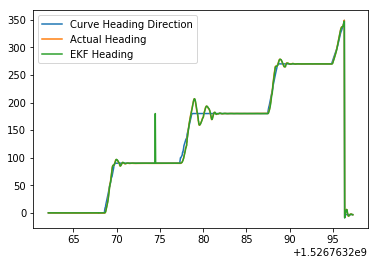

In [262]:
plt.plot(times, np.array([curve_headings, actual_headings, ekf_headings]).T)
plt.legend(("Curve Heading Direction", "Actual Heading", "EKF Heading"))
plt.show()

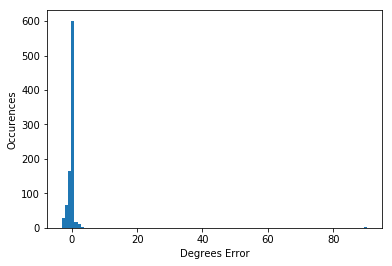

In [175]:
_ = plt.hist(ekf_headings - actual_headings, bins=100)
_ = plt.xlabel("Degrees Error")
_ = plt.ylabel("Occurences")

In [176]:
def process_bagfiles_for_final_errors(bags):
    # this is rather inefficient but not doing high volume right now
    positional_errors = []
    heading_errors = []
    
    for bagfile in bags:
        bag = rosbag.Bag(bagfile)
        times, pts, actual_pts, ekf_pts = extract_path_points(bag)
        times, actual_headings, ekf_headings, curve_headings = extract_orientations(bag)
        
        # mostly want to check the distnace between the last positions and headings
        last_ekf_heading, last_actual_heading = ekf_headings[-1], actual_headings[-1]
        heading_errors.append(last_actual_heading - last_ekf_heading)
        
        last_actual_pt, last_ekf_pt = actual_pts[-1], ekf_pts[-1]
        positional_errors.append(np.linalg.norm(last_actual_pt - last_ekf_pt))
    return np.array(positional_errors), np.array(heading_errors)

In [319]:
flattened_all_bagfiles = [x for y in all_bag_files for x in y]
pos_errors, heading_errors = process_bagfiles_for_final_errors(flattened_all_bagfiles)

In [320]:
print(pos_errors,heading_errors)
print(np.mean(pos_errors), np.max(pos_errors))
print(np.mean(np.abs(heading_errors)))

(array([ 1.62134343,  2.63468279,  4.48715211,  0.38719854,  1.51399374,
        2.23051348,  1.47070226]), array([-0.00858329,  0.18843818,  0.2522387 ,  0.13733588,  0.11908051,
       -0.19073607, -0.36059333]))
(2.0493694785919483, 4.4871521088197346)
0.179572280942


In [331]:
def pdf(mean, stddev, value):
    """ returns prob density at a given value """
    value_centered = value - mean
    var = float(stddev)**2
    denom = (2*np.pi*var)**0.5
    num = np.exp(-(value_centered)**2/(2*var))
    return num/denom

def pdf2(mean, stddev, value, dx=0.00000001):
    return st.norm.cdf(value-mean, scale=stddev) - st.norm.cdf(value-mean-dx, scale=stddev)

def motion_model(ekf_start, ekf_end, ekf_start_heading, 
                 ekf_end_heading, actual_start, actual_end, 
                 actual_start_heading, actual_end_heading, 
                 alpha=np.array([0.0001, 0.00008, 0.00008, 0.0001]), scaling=1.0, verbose=False):
    """ Implements psoterior distribution from freiburg slides"""

    
    if ekf_start_heading < 0:
        ekf_start_heading += 2*np.pi
    if ekf_end_heading < 0:
        ekf_end_heading += 2*np.pi
    if actual_start_heading < 0:
        actual_start_heading += 2*np.pi
    if actual_end_heading < 0:
        actual_end_heading += 2*np.pi
    
    # compute ground truth deltas
    diff_actual = actual_end - actual_start
    d_trans = np.linalg.norm(diff_actual)
    angle1 = np.arctan2(diff_actual[1], diff_actual[0])
    if angle1 < 0:
        angle1 += 2*np.pi
    # just shift away from 2pi/0 boundaries when close
    if angle1 > 5 or angle1 < 1.2 or actual_start_heading > 5 or actual_start_heading < 1.2 or actual_end_heading > 5 or actual_end_heading < 1.2:
        angle1 = (angle1 + np.pi) % (2*np.pi) # this is safe since we only use d_rot1 and d_rot2 in abs!!
        actual_start_heading = (actual_start_heading + np.pi) % (2*np.pi)
        actual_end_heading = (actual_end_heading + np.pi) % (2*np.pi)
    d_rot1 = angle1 - actual_start_heading
    d_rot2 = actual_end_heading - angle1
    
    # compute believed deltas
    diff_ekf = ekf_end - ekf_start
    dhat_trans = np.linalg.norm(diff_ekf)
    angle2 = np.arctan2(diff_ekf[1], diff_ekf[0])
    if angle2 < 0:
        angle2 += 2*np.pi

    # just shift away from 2pi/0 boundaries when close
    if angle2 > 5 or angle2 < 1.2 or ekf_start_heading > 5 or ekf_start_heading < 1.2 or ekf_end_heading > 5 or ekf_end_heading < 1.2:
        angle2 = (angle2 + np.pi) % (2*np.pi)
        ekf_start_heading = (ekf_start_heading + np.pi) % (2*np.pi)
        ekf_end_heading = (ekf_end_heading + np.pi) % (2*np.pi)

        
    dhat_rot1 = angle2 - ekf_start_heading
    dhat_rot2 = ekf_end_heading - angle2
    
    # compute probabilities of these occuring
    stddev1 = alpha[0]*np.abs(dhat_rot1) + alpha[1]*dhat_trans
    stddev2 = alpha[2]*dhat_trans + alpha[3]*(np.abs(dhat_rot1) + np.abs(dhat_rot2))
    stddev3 = alpha[0]*np.abs(dhat_rot1) + alpha[1]*dhat_trans
    
    p1 = pdf(0, stddev1, d_rot1 - dhat_rot1)
    p2 = pdf(0, stddev2, d_trans - dhat_trans)
    p3 = pdf(0, stddev3, d_rot2 - dhat_rot2)
    
    value = scaling * p1 * p2 * p3
    if (value > 10000 or value == 0.0) and verbose:

        print("\nActual points: {0}, {1}".format(actual_start, actual_end))
        print("Actual start heading: {0}, end heading: {1}".format(actual_start_heading, actual_end_heading))
        print("EKf points: {0}, {1}".format(ekf_start, ekf_end))

        print("Actual movement angle: {0}".format(angle1))
        print("EKF movement angle: {0}".format(angle2))
        print("d_rot1: {0}, d_rot2: {1}, d_trans: {2}".format(d_rot1, d_rot2, d_trans))
        print("dhat_rot1: {0}, dhat_rot2: {1}, dhat_trans: {2}".format(dhat_rot1, dhat_rot2, dhat_trans))
        print("Diff rot1: {0}, diff trans: {1}, diff rot2: {2}".format(d_rot1 - dhat_rot1, d_trans-dhat_trans, d_rot2-dhat_rot2))
        print("stddev1: {0}, stddev2: {1}, stddev3: {2}".format(stddev1, stddev2, stddev3))

        print("P1: {0}, p2: {1}, P3: {2}, value: {3}".format(p1, p2, p3, value))
    
    return value

def sensor_model(ekf_state, camera_measurment):
    pass
    

    
    
def calculate_conditional_entropy(bag, verbose=False):
    prior_prob = 1.0
    motion_model_prob = prior_prob
    prob_movements = []
    for msg in bag:
        msg = msg.message
        true_odom = msg.true_odom
        ekf_odom = msg.ekf_odom
        true_pos = point_to_numpy(true_odom.pose.pose.position)

        ekf_pos = point_to_numpy(ekf_odom.pose.pose.position)
        true_rpy = quat_to_rpy(quat_to_numpy(true_odom.pose.pose.orientation))
        true_heading = true_rpy[2]
        ekf_rpy = quat_to_rpy(quat_to_numpy(ekf_odom.pose.pose.orientation))
        ekf_heading = ekf_rpy[2]

        last_ekf_pos = np.array(list(msg.last_ekf_state[:2]) + [0.0])
        last_ekf_heading = msg.last_ekf_state[2]
        last_true_pos = point_to_numpy(msg.last_true_pos)
        last_true_heading = msg.last_true_heading
        
        if np.array_equal(last_true_pos, true_pos):
            continue
        
        
        prob_movement = motion_model(last_ekf_pos, ekf_pos, 
                                     last_ekf_heading, ekf_heading, 
                                     last_true_pos, true_pos,
                                     last_true_heading, true_heading, scaling=1e-10, verbose=verbose)
        

        if prob_movement == 0.0:
            print "*********** 0.0!! ********"
        motion_model_prob *= prob_movement
        
        prob_movements.append(prob_movement)
#         if motion_model_prob > 1000:
#             print(motion_model_prob)

    return motion_model_prob, np.array(prob_movements)

#     # get EKF believed positions
#     times, pts, actual_pts, ekf_pts = extract_path_points(bag)
#     times2, actual_headings, ekf_headings, curve_headings = extract_orientations(bag)
#     actual_headings = np.deg2rad(actual_headings)
#     ekf_headings = np.deg2rad(ekf_headings)

#     # iterate over pairs
#     for i in range(actual_pts.shape[0]- 1):
#         actual_start, actual_end = actual_pts[i], actual_pts[i+1]
#         ekf_start, ekf_end = ekf_pts[i], ekf_pts[i+1]

#         actual_heading_start, actual_heading_end = actual_headings[i], actual_headings[i+1]
#         ekf_heading_start, ekf_heading_end = ekf_headings[i], ekf_headings[i+1]

#         p = motion_model(ekf_start, ekf_end, ekf_heading_start, 
#              ekf_heading_end, actual_start, actual_end, 
#              actual_heading_start, actual_heading_end)
#         print(p)
#         motion_model_prob *= p
#     return motion_model_prob                      
                                                              
        
        

In [332]:
np.linalg.norm(np.array([ 374.57702884 , 428.73417573]) - np.array([ 374.64206716,  428.52536058]))

0.21870928178280788

In [333]:
for b in flattened_all_bagfiles:
    bag = rosbag.Bag(b)
    val, ps = calculate_conditional_entropy(bag, verbose=True)
    print("Prob of path: {0}".format(val))


Actual points: [  3.69699323e+02   4.32547098e+02   5.42551225e-03], [  3.69675446e+02   4.32553631e+02   5.42455268e-03]
Actual start heading: 2.88948364845, end heading: 2.8955644076
EKf points: [ 371.91866623  431.37308232    0.        ], [ 371.8948252   431.37973566    0.        ]
Actual movement angle: 2.8745438355
EKF movement angle: 2.86944547572
d_rot1: -0.0149398129486, d_rot2: 0.0210205721027, d_trans: 0.0247550802255
dhat_rot1: -0.0149361131893, dhat_rot2: 0.0210170776087, dhat_trans: 0.0247520072615
Diff rot1: -3.69975921632e-06, diff trans: 3.07296396974e-06, diff rot2: 3.49449397863e-06
stddev1: 3.47377189986e-06, stddev2: 5.57547966073e-06, stddev3: 3.47377189986e-06
P1: 65131.2412233, p2: 61470.1346613, P3: 69240.9638495, value: 27721.4934811
Prob of path: 0.0

Actual points: [  3.70666983e+02   4.31381513e+02   5.45747501e-03], [  3.70648259e+02   4.31397819e+02   5.45884943e-03]
Actual start heading: 2.46316382967, end heading: 2.46956445337
EKf points: [ 373.3823201

Prob of path: 5.94778959269e-251


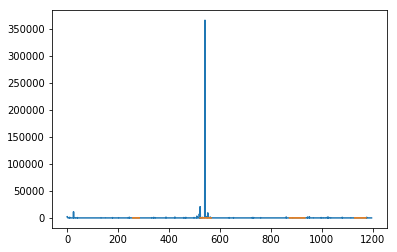

In [268]:
plt.plot(ps)
plt.plot(radii)

In [16]:
def log_pdf(mean, stddev, value):
    """ returns log of prob density at a given value """
    value_centered = value - mean
    var = float(stddev)**2
    log_coeff = -0.5 * np.log(2*np.pi) - np.log(stddev)
    log_exp = - (value_centered)**2/var
    return log_coeff + log_exp

def log_motion_model(ekf_start, ekf_end, ekf_start_heading, 
                 ekf_end_heading, actual_start, actual_end, 
                 actual_start_heading, actual_end_heading, 
                 alpha=np.array([0.0001, 0.00008, 0.00008, 0.0001])):
    """ Implements log of posterior distribution from freiburg slides (underflow...)"""

    # compute ground truth deltas
    diff_actual = actual_end - actual_start
    d_trans = np.linalg.norm(diff_actual)
    angle1 = np.arctan2(diff_actual[1], diff_actual[0])
    d_rot1 = angle1 - actual_start_heading
    d_rot2 = actual_end_heading - angle1
    
    # compute believed deltas
    diff_ekf = ekf_end - ekf_start
    dhat_trans = np.linalg.norm(diff_ekf)
    angle2 = np.arctan2(diff_ekf[1], diff_ekf[0])
    dhat_rot1 = angle2 - ekf_start_heading
    dhat_rot2 = ekf_end_heading - angle2
    
    # compute probabilities of these occuring
    stddev1 = alpha[0]*np.abs(dhat_rot1) + alpha[1]*dhat_trans
    stddev2 = alpha[2]*dhat_trans + alpha[3]*(np.abs(dhat_rot1) + np.abs(dhat_rot2))
    stddev3 = alpha[0]*np.abs(dhat_rot1) + alpha[1]*dhat_trans
    
    p1 = log_pdf(0, stddev1, d_rot1 - dhat_rot1)
    p2 = log_pdf(0, stddev2, d_trans - dhat_trans)
    p3 = log_pdf(0, stddev3, d_rot2 - dhat_rot2)
    print("d_rot1: {0}, d_rot2: {1}, d_trans: {2}".format(d_rot1, d_rot2, d_trans))
    print("dhat_rot1: {0}, dhat_rot2: {1}, dhat_trans: {2}".format(dhat_rot1, dhat_rot2, dhat_trans))
    print("Diffs: {0}, {1}, {2}".format(d_rot1 - dhat_rot1, d_trans-dhat_trans, d_rot2-dhat_rot2))
    print("stddev1: {0}, stddev2: {1}, stddev3: {2}".format(stddev1, stddev2, stddev3))

    print("P1: {0}, p2: {1}, P3: {2}".format(p1, p2, p3))
    
    return p1+p2+p3

def sensor_model(ekf_state, camera_measurment):
    pass
    
    

def calculate_log_conditional_entropy(bag):
    
    # reorder bag based on header timestamps...
    with rosbag.Bag('tmp.bag', 'w') as outbag:
        for topic, msg, t in bag.read_messages():
            outbag.write(topic, msg, msg.header.stamp if msg._has_header else t)
    
    bag = rosbag.Bat('tmp.bag')

    
    log_prior_prob = np.log(1.0)
    log_motion_model_prob = log_prior_prob

    # get EKF believed positions
    times, pts, actual_pts, ekf_pts = extract_path_points(bag)
    times2, actual_headings, ekf_headings, curve_headings = extract_orientations(bag)

    # iterate over pairs
    for i in range(actual_pts.shape[0]- 1):
        actual_start, actual_end = actual_pts[i], actual_pts[i+1]
        ekf_start, ekf_end = ekf_pts[i], ekf_pts[i+1]

        actual_heading_start, actual_heading_end = actual_headings[i], actual_headings[i+1]
        ekf_heading_start, ekf_heading_end = ekf_headings[i], ekf_headings[i+1]

        log_p = log_motion_model(ekf_start, ekf_end, ekf_heading_start, 
             ekf_heading_end, actual_start, actual_end, 
             actual_heading_start, actual_heading_end)
        print(log_p)
        log_motion_model_prob += log_p
    return log_motion_model_prob  

In [145]:
print(calculate_conditional_entropy(bag2))

d_rot1: -0.15805126136, d_rot2: 0.146000566037, d_trans: 0.0812890444362
dhat_rot1: -0.158018780621, dhat_rot2: 0.145866447448, dhat_trans: 0.0812854385999
Diffs: -3.24807388281e-05, 3.60583629393e-06, 0.000134118589039
stddev1: 2.23047131501e-05, stddev2: 3.68913578949e-05, stddev3: 2.23047131501e-05
P1: 7.67117520289, p2: 9.27904119966, P3: -26.3645830819
-9.41436667938
d_rot1: -0.146085707949, d_rot2: 0.142640533308, d_trans: 0.115969162893
dhat_rot1: -0.145949830874, dhat_rot2: 0.143216711229, dhat_trans: 0.115968962991
Diffs: -0.000135877074837, 1.99902751491e-07, -0.000576177920577
stddev1: 2.38725001267e-05, stddev2: 3.81941712496e-05, stddev3: 2.38725001267e-05
P1: -22.6725414526, p2: 9.25386171264, P3: -572.804973327
-586.223653067
d_rot1: -0.142681948674, d_rot2: 0.139098822089, d_trans: 0.103122049897
dhat_rot1: -0.143245541973, dhat_rot2: 0.139953837539, dhat_trans: 0.103120549477
Diffs: 0.000563593299284, 1.50041950707e-06, -0.000855015450309
stddev1: 2.25741981555e-05, st

stddev1: 0.00013402087753, stddev2: 0.00013907931435, stddev3: 0.00013402087753
P1: -51323.0071288, p2: 5.35614792153, P3: -29111.5234976
-80429.1744784
d_rot1: -0.0278056392523, d_rot2: 0.0226072962373, d_trans: 1.59715831101
dhat_rot1: -0.0505987082277, dhat_rot2: 0.0330259490385, dhat_trans: 1.5971757876
Diffs: 0.0227930689754, -1.74765867396e-05, -0.0104186528012
stddev1: 0.000132833933831, stddev2: 0.000136136528735, stddev3: 0.000132833933831
P1: -29435.3641756, p2: 7.9664335013, P3: -6143.83296422
-35571.2307063
d_rot1: -0.0226972980089, d_rot2: 0.0277921091949, d_trans: 1.79692355654
dhat_rot1: -0.0335056418432, dhat_rot2: 0.0281113842896, dhat_trans: 1.5971501937
Diffs: 0.0108083438343, 0.199773362832, -0.000319275094742
stddev1: 0.000131122579681, stddev2: 0.00013393371811, stddev3: 0.000131122579681
P1: -6786.57079046, p2: -2224814.20259, P3: 2.0915259041
-2231598.68186
d_rot1: -0.0278377373386, d_rot2: 0.0161307269018, d_trans: 0.598990183412
dhat_rot1: -0.0280454993685, dh

d_rot1: -0.0824729411908, d_rot2: -0.725320280648, d_trans: 1.09854357083
dhat_rot1: -0.0465370331763, dhat_rot2: -0.762984786109, dhat_trans: 1.09850681239
Diffs: -0.0359359080145, 3.67584459631e-05, 0.0376645054614
stddev1: 9.25342483086e-05, stddev2: 0.000168832726919, stddev3: 9.25342483086e-05
P1: -150809.30658, p2: 7.72026110688, P3: -165667.606436
-316469.192754
d_rot1: 0.710181065452, d_rot2: -1.90055795108, d_trans: 1.10240245212
dhat_rot1: 0.747933681308, dhat_rot2: -1.92510373823, dhat_trans: 1.1026051042
Diffs: -0.0377526158564, -0.000202652085533, 0.024545787147
stddev1: 0.000163001776467, stddev2: 0.00035551215029, stddev3: 0.000163001776467
P1: -53634.7482038, p2: 6.6980800182, P3: -22668.3436078
-76296.3937315
d_rot1: 1.8798108949, d_rot2: -3.3052424088, d_trans: 0.865558293754
dhat_rot1: 1.90452494938, dhat_rot2: -3.32492221713, dhat_trans: 0.865591562604
Diffs: -0.0247140544817, -3.32688504956e-05, 0.019679808334
stddev1: 0.000259699819947, stddev2: 0.00059219204166, 

P1: -108.294146278, p2: 1.99244284703, P3: -107.445914199
-213.747617631
d_rot1: -271.900481001, d_rot2: 271.912393904, d_trans: 1.19788227094
dhat_rot1: -271.614553783, dhat_rot2: 271.620364658, dhat_trans: 1.19783665259
Diffs: -0.285927218112, 4.5618346189e-05, 0.292029246221
stddev1: 0.0272572823105, stddev2: 0.0544193187763, stddev3: 0.0272572823105
P1: -107.355316022, p2: 1.99209682769, P3: -112.102151994
-217.465371188
d_rot1: -271.912220252, d_rot2: 271.921384737, d_trans: 1.19791746924
dhat_rot1: -271.620384501, dhat_rot2: 271.610298686, dhat_trans: 1.39771241762
Diffs: -0.2918357509, -0.199794948383, 0.31108605135
stddev1: 0.0272738554435, stddev2: 0.0544348853121, stddev3: 0.0272738554435
P1: -111.81142551, p2: -11.4796396742, P3: -127.414329358
-250.705394542
d_rot1: -271.921242004, d_rot2: 271.918713996, d_trans: 1.3976004654
dhat_rot1: -271.610162415, dhat_rot2: 271.627673492, dhat_trans: 1.59723575805
Diffs: -0.311079588906, -0.199635292648, 0.291040503906
stddev1: 0.0272

d_rot1: -152.190064601, d_rot2: 153.358717485, d_trans: 0.531901588292
dhat_rot1: -151.982149159, dhat_rot2: 153.151837817, dhat_trans: 0.531937569094
Diffs: -0.207915442629, -3.59808019873e-05, 0.206879667755
stddev1: 0.0152407699214, stddev2: 0.0305559537031, stddev3: 0.0152407699214
P1: -182.840859753, p2: 2.56925580865, P3: -180.991228369
-361.262832313
d_rot1: -153.344725779, d_rot2: 154.302065802, d_trans: 0.342362830692
dhat_rot1: -153.137850487, dhat_rot2: 154.09173834, dhat_trans: 0.342375688395
Diffs: -0.206875291842, -1.28577028704e-05, 0.21032746203
stddev1: 0.0153411751038, stddev2: 0.0307503489378, stddev3: 0.0153411751038
P1: -178.586149752, p2: 2.56291522918, P3: -184.705736709
-360.728971232
d_rot1: -154.276293884, d_rot2: 156.691747161, d_trans: 0.706651153414
dhat_rot1: -154.06598353, dhat_rot2: 156.480604667, dhat_trans: 0.706630667935
Diffs: -0.210310354048, 2.04854786378e-05, 0.211142493679
stddev1: 0.0154631288064, stddev2: 0.0311111892731, stddev3: 0.01546312880

-64.0312068979
d_rot1: -183.348087215, d_rot2: 183.357016097, d_trans: 0.199699124914
dhat_rot1: -183.247118474, dhat_rot2: 183.232410989, dhat_trans: 1.19827771453
Diffs: -0.100968740897, -0.998578589615, 0.124605108141
stddev1: 0.0184205740646, stddev2: 0.0367438151634, stddev3: 0.0184205740646
P1: -26.9693298709, p2: -736.192536999, P3: -42.6824763149
-805.844343184
d_rot1: -183.357096613, d_rot2: 183.337007264, d_trans: 1.39776293158
dhat_rot1: -183.232554744, dhat_rot2: 183.212826842, dhat_trans: 1.39764923864
Diffs: -0.124541868991, 0.000113692945211, 0.124180421979
stddev1: 0.0184350674134, stddev2: 0.0367563500976, stddev3: 0.0184350674134
P1: -42.564982046, p2: 2.38449617569, P3: -42.3004551184
-82.4809409887
d_rot1: -183.337283736, d_rot2: 183.317089627, d_trans: 2.79521205936
dhat_rot1: -183.212946267, dhat_rot2: 183.213869217, dhat_trans: 1.39759050759
Diffs: -0.124337469184, 1.39762155178, 0.103220409587
stddev1: 0.0184331018673, stddev2: 0.0367544887891, stddev3: 0.018433

P1: -33.3237030087, p2: -122.890136184, P3: -48.4958609396
-204.709700132
d_rot1: -88.5532933647, d_rot2: 88.5445373994, d_trans: 1.59711054292
dhat_rot1: -88.4885191155, dhat_rot2: 88.4874762986, dhat_trans: 1.19777372601
Diffs: -0.0647742491728, 0.399336816914, 0.0570611008005
stddev1: 0.00894467380963, stddev2: 0.0177934214395, stddev3: 0.00894467380963
P1: -48.643820554, p2: -500.575888662, P3: -36.8981994856
-586.117908702
d_rot1: -88.5446924127, d_rot2: 88.5356092551, d_trans: 1.59709909709
dhat_rot1: -88.487846181, dhat_rot2: 88.4754557918, dhat_trans: 1.59694432801
Diffs: -0.056846231721, 0.000154769083604, 0.0601534632987
stddev1: 0.00897654016434, stddev2: 0.0178240857435, stddev3: 0.00897654016434
P1: -36.3095866507, p2: 3.10819067451, P3: -41.1116886317
-74.3130846079
d_rot1: -88.5357434742, d_rot2: 88.5397162462, d_trans: 0.998220232014
dhat_rot1: -88.4753736215, dhat_rot2: 88.4702650971, dhat_trans: 1.59743375226
Diffs: -0.0603698526362, -0.599213520247, 0.0694511491722
s

In [32]:
msgs1, msgs2 = bag.read_messages(), bag2.read_messages()

In [36]:
for a,b in zip(msgs1, msgs2):
    (_,_,t), (_,_,t2) = a, b
    if t != t2:
        print a, b

In [45]:
# see if there are any out of order messages, based on EKF timestamp
last_msg = None

for msg in rosbag.Bag(all_bag_files[0][0]):
    msg = msg.message
    if last_msg is None:
        last_msg = msg
        continue
#     print msg.ekf_odom.header.stamp.to_sec()
#     print "--{0}".format(msg.header.stamp.to_sec())
    last_t = last_msg.ekf_odom.header.stamp.to_sec()
    this_t = msg.ekf_odom.header.stamp.to_sec()
    if last_t > this_t:
        print("OUt of order!")
    if last_msg.header.stamp.to_sec() > msg.header.stamp.to_sec():
        print("Bag timestamps out of order")